<a href="https://colab.research.google.com/github/abhishek0939/D-SOC/blob/main/DSOC_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install -q kaggle

In [1]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [26]:
! kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                     📚 Students Performance Dataset 📚                  66KB  2024-06-12 23:09:20           6246        132  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024               Most Streamed Spotify Songs 2024                 496KB  2024-06-15 18:50:51           4960        108  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26          12952        226  1.0              
anthonytherrien/restaurant-revenue-prediction-dataset           Restaurant 

In [6]:
! kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset
License(s): CC-BY-NC-SA-4.0
 96% 170M/178M [00:01<00:00, 143MB/s]
100% 178M/178M [00:01<00:00, 120MB/s]


In [7]:
! unzip online-payments-fraud-detection-dataset.zip

Archive:  online-payments-fraud-detection-dataset.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [33]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


#Feature Engineering (EDA)

In [9]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['type'])

# Drop column B as it is now encoded
df = df.drop('type',axis = 1)

# Join the encoded df
df = df.join(one_hot)

In [35]:
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True


In [10]:
df['nameOrig'].str[:-8].unique()

array(['C12', 'C16', 'C13', 'C8', 'C20', 'C', 'C1', 'C19', 'C7', 'C2',
       'C17', 'C10', 'C9', 'C15', 'C5', 'C21', 'C14', 'C4', 'C3', 'C11',
       'C6', 'C18', ''], dtype=object)

In [11]:
df['nameOrig_type'] = df['nameOrig'].str[:-8]

In [38]:
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameOrig_type
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False,C12
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False,C16
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True,C13
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False,C8
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False,C20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False,C7
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True,C15
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False,C11
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True,C16


In [12]:
df = df.drop(columns = ['nameOrig'])

In [40]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameOrig_type
0,1,9839.64,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False,C12
1,1,1864.28,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False,C16
2,1,181.00,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True,C13
3,1,181.00,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False,C8
4,1,11668.14,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False,C20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False,C7
6362616,743,6311409.28,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True,C15
6362617,743,6311409.28,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False,C11
6362618,743,850002.52,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True,C16


In [13]:
df['nameDest_type'] = df['nameDest'].str[:1]
df = df.drop(columns = ['nameDest'])

In [42]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameOrig_type,nameDest_type
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False,C12,M
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False,C16,M
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,C13,C
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,C8,C
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False,C20,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False,C7,C
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True,C15,C
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False,C11,C
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True,C16,C


In [14]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['nameDest_type'])

# Drop column B as it is now encoded
df = df.drop('nameDest_type',axis = 1)

# Join the encoded df
df = df.join(one_hot)

In [44]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameOrig_type,C,M
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False,C12,False,True
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False,C16,False,True
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,C13,True,False
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,C8,True,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False,C20,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False,C7,True,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True,C15,True,False
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False,C11,True,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True,C16,True,False


In [15]:
df = df.drop(columns = ['M'])

In [46]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameOrig_type,C
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False,C12,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False,C16,False
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,C13,True
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,C8,True
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False,C20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False,C7,True
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True,C15,True
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False,C11,True
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True,C16,True


#EDA

Normalization

In [16]:
def normalize(df, col):

  # Calculate the minimum and maximum.
  min_val = df[col].min()
  max_val = df[col].max()

  # Normalize the values using the min-max formula.
  df[col] = (df[col] - min_val) / (max_val - min_val)

In [17]:
fields = ['step',
          'amount',
          'oldbalanceOrg',
          'newbalanceOrig',
          'oldbalanceDest',
          'newbalanceDest']

for field in fields:
  normalize(df, field)

In [49]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameOrig_type,C
0,0.0,0.000106,0.002855,0.003233,0.000000,0.000000,0,0,False,False,False,True,False,C12,False
1,0.0,0.000020,0.000357,0.000391,0.000000,0.000000,0,0,False,False,False,True,False,C16,False
2,0.0,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,C13,True
3,0.0,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False,C8,True
4,0.0,0.000126,0.000697,0.000603,0.000000,0.000000,0,0,False,False,False,True,False,C20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.000000,0.000000,0.000954,1,0,False,True,False,False,False,C7,True
6362616,1.0,0.068272,0.105923,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,C15,True
6362617,1.0,0.068272,0.105923,0.000000,0.000192,0.017912,1,0,False,True,False,False,False,C11,True
6362618,1.0,0.009195,0.014265,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,C16,True


In [18]:
df['nameDest_type_C'] = df['C']
df = df.drop(columns = ['C'])

In [51]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameOrig_type,nameDest_type_C
0,0.0,0.000106,0.002855,0.003233,0.000000,0.000000,0,0,False,False,False,True,False,C12,False
1,0.0,0.000020,0.000357,0.000391,0.000000,0.000000,0,0,False,False,False,True,False,C16,False
2,0.0,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,C13,True
3,0.0,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False,C8,True
4,0.0,0.000126,0.000697,0.000603,0.000000,0.000000,0,0,False,False,False,True,False,C20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.000000,0.000000,0.000954,1,0,False,True,False,False,False,C7,True
6362616,1.0,0.068272,0.105923,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,C15,True
6362617,1.0,0.068272,0.105923,0.000000,0.000192,0.017912,1,0,False,True,False,False,False,C11,True
6362618,1.0,0.009195,0.014265,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,C16,True


In [19]:
df_isFraud = df[df['isFraud'] == 1]

In [20]:
df_isFraud['isFraud'].sum()

8213

In [21]:
df_isnotFraud = df[df['isFraud'] == 0]

In [22]:
df_isnotFraud = df_isnotFraud.sample(8213)

In [23]:
df_new = pd.concat([df_isFraud, df_isnotFraud])

In [57]:
df_new

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameOrig_type,nameDest_type_C
2,0.000000,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,C13,True
3,0.000000,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False,C8,True
251,0.000000,0.000030,0.000047,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,C14,True
252,0.000000,0.000030,0.000047,0.000000,0.000074,0.000000,1,0,False,True,False,False,False,C21,True
680,0.000000,0.000218,0.000338,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,C1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773442,0.051213,0.002180,0.000000,0.000000,0.001135,0.001700,0,0,False,True,False,False,False,C1,True
3591845,0.351752,0.000057,0.000585,0.000597,0.000000,0.000000,0,0,False,False,False,True,False,C9,False
4335164,0.413747,0.005172,0.011234,0.023142,0.023089,0.021736,0,0,True,False,False,False,False,C13,True
1343947,0.183288,0.001470,0.002252,0.005447,0.000058,0.000000,0,0,True,False,False,False,False,C17,True


In [24]:
df_new = df_new.drop(columns = ['nameOrig_type'])

In [25]:
# Data Processing
import pandas as pd   # Already imported
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [26]:
# Split the data into features (X) and target (y)
X = df_new.drop('isFraud', axis=1)
y = df_new['isFraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
df_new

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_type_C
2,0.000000,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
3,0.000000,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False,True
251,0.000000,0.000030,0.000047,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
252,0.000000,0.000030,0.000047,0.000000,0.000074,0.000000,1,0,False,True,False,False,False,True
680,0.000000,0.000218,0.000338,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773442,0.051213,0.002180,0.000000,0.000000,0.001135,0.001700,0,0,False,True,False,False,False,True
3591845,0.351752,0.000057,0.000585,0.000597,0.000000,0.000000,0,0,False,False,False,True,False,False
4335164,0.413747,0.005172,0.011234,0.023142,0.023089,0.021736,0,0,True,False,False,False,False,True
1343947,0.183288,0.001470,0.002252,0.005447,0.000058,0.000000,0,0,True,False,False,False,False,True


In [27]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
y_pred = rf.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9905660377358491


In [30]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x792925fc2260>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x792925fc1ae0>})

In [31]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 367}


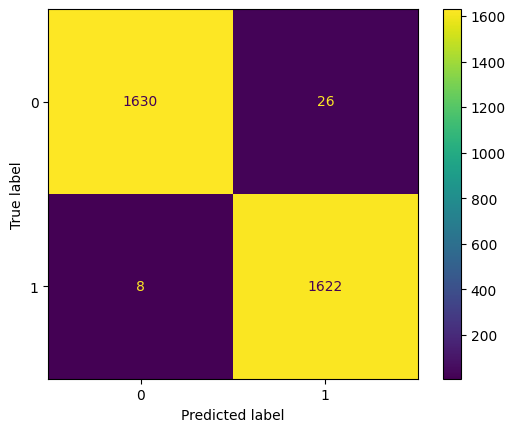

In [32]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [33]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9896530736457699
Precision: 0.9842233009708737
Recall: 0.9950920245398773


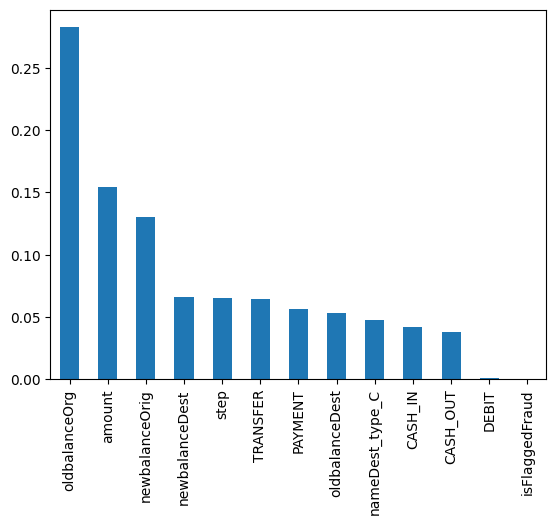

In [34]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [35]:
! pip install fastapi nest-asyncio pyngrok uvicorn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [36]:
# # ------------ Created inside main.py ---------------------


# from fastapi import FastAPI

# # Create a FastAPI application
# app = FastAPI()

# # Define a route at the root web address ("/")
# @app.get("/")
# def read_root():
#     return {"Welcome to first API!"}

# @app.get("/predict")
# def predict(params: dict):
#     # Convert params to a DataFrame
#     input_df = pd.DataFrame([params])

#     # Make predictions using your trained model
#     prediction = best_rf.predict(input_df)[0]

#     # Return the prediction
#     return {"prediction": int(prediction)}

In [37]:
from fastapi import FastAPI
import nest_asyncio
from pyngrok import ngrok
import uvicorn

# # Create a FastAPI application
# app = FastAPI()

# # Define a route at the root web address ("/")
# @app.get("/")
# def read_root():
#     return {"Welcome to Fraud Detection API!"}

In [38]:
! ngrok config add-authtoken 2iWHwuYsklVjtNr4P6FZmSW5qq3_oSsr5yovwf2GnhQjvTqm

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [1]:
app = FastAPI()

# Define a route at the root web address ("/")
@app.get("/")
def read_root():
    return {"Welcome to Fraud Detection API!"}

@app.get("/predict")
def predict(params):
    # Convert params to a DataFrame
    input_df = pd.DataFrame(dict(eval(params)))

    # Make predictions using your trained model
    prediction = best_rf.predict(input_df)[0]

    # Return the prediction
    return prediction

NameError: name 'FastAPI' is not defined